In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np

print(tf.__version__)


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of the training and test data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

2.15.0
11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [2]:
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_train[0].shape


(28, 28, 1)

In [3]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, dtype ="uint8")
y_test = to_categorical(y_test, dtype ="uint8")

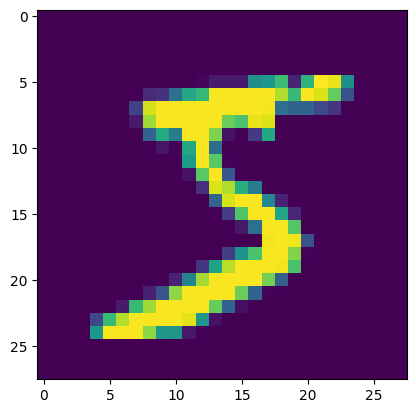

In [4]:
plt.imshow(x_train[0])

In [5]:
# Define the Convolutional Neural Network

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu')
])

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
model.fit(x_train, y_train,epochs=100, validation_data=(x_test,y_test),

    callbacks=[reduce_lr,early_stopping])

Epoch 1/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2799 - accuracy: 0.9417 - val_loss: 0.0674 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 2/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0685 - accuracy: 0.9795 - val_loss: 0.0590 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 3/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0546 - accuracy: 0.9834 - val_loss: 0.0539 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 4/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0421 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 5/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0506 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 6/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0610 - val_accuracy: 0.9833 - lr: 0.0010
Epoch 7/100
1875/1875 [=======================

In [10]:
x_test[0].shape

(28, 28)

In [12]:
predictions=model.predict(np.expand_dims(np.expand_dims(x_test[0], axis=-1) ,axis=0))

1/1 [==============================] - 0s 24ms/step


In [14]:
predicted_class_index = np.argmax(predictions, axis=1)

predicted_class_index[0]

7

In [16]:
classes={0:"Zero",1:"One",2:"Two",3:"Three",4:"Four",5:"Five",6:"Six",7:"Seven",8:"Eigth",9:"Nine",10:"Ten"}

In [17]:
classes[predicted_class_index[0]]

'Seven'